# VISIONS-2 data plotter

#### Interesting Events (Low-Flyer). Apogee at 601 km at 436 MET

VLF Data

MET         ALT         NOTES
140-141     240-240     10-100 Hz burst    
255-257     462-462     LHSS
330-340     555-560     ~500 Hz narrowband VLF waves.
360-390     580-590     ~500 Hz narrowband VLF waves. Sometimes bursty, sometimes prolonged.
422-423     600-600     10-100 Hz burst
375-510     585-600     200 Hz continuous band
440-540     600-560     ~500 Hz narrowband VLF waves. Sometimes bursty, sometimes prolonged.
500-510     580-585     Two bursts at 500 Hz
523-524     570-570     4 kHz chunk separate from neighboring VLF waves
639-640     433-434     4 kHz chunk separate from neighboring VLF waves

Summary: 

EEA Data
330-340                 Dispersed and clear e- injectelec

EIA Data


Overall notes:

-Often an inverse correlation b/t ~20 Hz power and VLF power
-Often an inverse correlation b/t 300-700 Hz power and keV e-
-Some of the largest VLF spikes are assoc. with spike-like enhancements at much lower freqs (which themselves are lower in amp than the VLF power). E.g. 400-500 MET 

### Load basic VISIONS-2 data

In [5]:
import sys 
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/mission_routines/rockets/visions2/')
sys.path.append('/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/')
import visions2_load_data
import v2  #plotting functions
import numpy as np 
import matplotlib.pyplot as plt

%load_ext nb_black
plt.rcParams['figure.figsize'] = [5, 2]


"""Enable auto module reloading"""
%load_ext autoreload
%autoreload 2

"""Load Langmuir Probe data"""
lp = visions2_load_data.load_langmuir()

"""Load magnetometer data"""
mag = visions2_load_data.load_mag()


"""Load E-field DC data (low-flyer only)"""
edc = visions2_load_data.load_efieldDC()

"""Load particle data"""
#All particle data
#elec = visions2_load_data.load_particle("eea")
#ions = visions2_load_data.load_particle("eia")

#Sum over pitch angles
elecPerp = visions2_load_data.load_particle("eea",range=[70,110],sumtype=1)
ionsPerp = visions2_load_data.load_particle("eia",range=[70,110],sumtype=1)
elecDowngoing = visions2_load_data.load_particle("eea",range=[-20,20],sumtype=1)
ionsDowngoing = visions2_load_data.load_particle("eia",range=[-20,20],sumtype=1)
elecUpgoing = visions2_load_data.load_particle("eea",range=[147,180],sumtype=1)
ionsUpgoing = visions2_load_data.load_particle("eia",range=[147,180],sumtype=1)
#Sum over energies
elecLowE = visions2_load_data.load_particle("eea",range=[0,100],sumtype=2)
ionsLowE = visions2_load_data.load_particle("eia",range=[0,10],sumtype=2)
elecHigE = visions2_load_data.load_particle("eea",range=[200,200000],sumtype=2)
ionsHigE = visions2_load_data.load_particle("eia",range=[1000,30000],sumtype=2)



"""Load VLF data"""
vlfdata = visions2_load_data.load_vlf()
vlf12_lf = vlfdata["vlf12_lf"]
#vlf34_hf = vlfdata["vlf34_hf"]

dvlf12_lf = vlf12_lf["dvlf12"]
#dvlf34_lf = vlf34_hf["dvlf34"]
times_vlf_lf = vlf12_lf["tvlf12"]
#times_vlf_hf = vlf34_hf["tvlf34"]

#sampling freq
sr_lf = [1/(times_vlf_lf[i+1]-times_vlf_lf[i]) for i in range(times_vlf_lf.size-1)]
#sr_hf = [1/(times_vlf_hf[i+1]-times_vlf_hf[i]) for i in range(times_vlf_hf.size-1)]
fsVLF_lf = np.mean(sr_lf)
#fsVLF_hf = np.mean(sr_hf)
fsVLF = fsVLF_lf

"""Get spectral data - I only know how to do this by plotting, which is awkward"""
fig, axs = plt.subplots(1)
Sxx, specfreqs, spectimes, im = axs.specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', cmap='turbo')
fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])


"""Create ratios of perp to parallel populations to see relative changes"""

ratioIDowngoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
ratioEDowngoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]
ratioIUpgoing = [[0 for col in range(np.size(ionsPerp["energies"]))] for row in range(np.size(ionsPerp["times"]))]
ratioEUpgoing = [[0 for col in range(np.size(elecPerp["energies"]))] for row in range(np.size(elecPerp["times"]))]

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])

for i in range(len(elecPerp["times"])):
    for j in range(len(elecPerp["energies"])):
        ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])

for i in range(len(ionsPerp["times"])):
    for j in range(len(ionsPerp["energies"])):
        ratioIUpgoing[i][j] = (ionsUpgoing["flux"][i,j])/(ionsPerp["flux"][i,j])

for i in range(len(elecPerp["times"])):
    for j in range(len(elecPerp["energies"])):
        ratioEUpgoing[i][j] = (elecUpgoing["flux"][i,j])/(elecPerp["flux"][i,j])





The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LOAD MAG: Currently low flyer only!
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 
LOAD VLF: Currently low flyer only


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/2008139370.py:79: RuntimeWarning: invalid value encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/2008139370.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  ratioIDowngoing[i][j] = (ionsDowngoing["flux"][i,j])/(ionsPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/2008139370.py:83: RuntimeWarning: invalid value encountered in double_scalars
  ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/2008139370.py:83: RuntimeWarning: divide by zero encountered in double_scalars
  ratioEDowngoing[i][j] = (elecDowngoing["flux"][i,j])/(elecPerp["flux"][i,j])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/2008139370.py:87: RuntimeWarning: invalid val

<IPython.core.display.Javascript object>

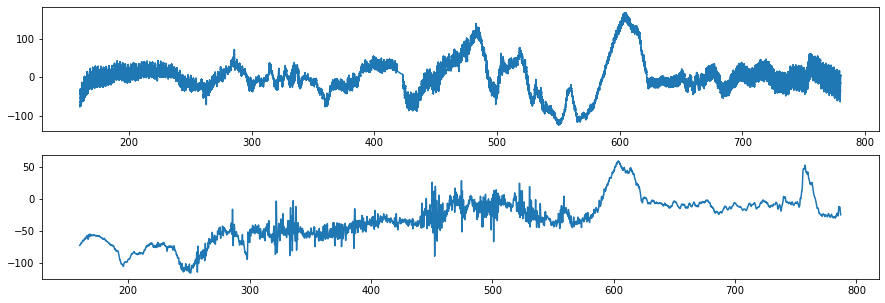

<IPython.core.display.Javascript object>

In [6]:
plt.rcParams['figure.figsize'] = [15, 5]



fig, axs = plt.subplots(2)
#print(np.shape(mag["mag_bon_xyz"]))
#axs[0].plot(mag["times"], mag["mag_bon_xyz"])
axs[0].plot(mag["timesdB"], mag["dBzonal"])
axs[1].plot(edc["times"], edc["Emerid"])



#### Create integrated line plots from spectra

In [8]:
plt.rcParams['figure.figsize'] = [15, 15]


smootime = 10. #smooth time in sec

vlfAmp_smoothed = v2.IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 3000, 10000, smootime)
eAmpPerp_smoothed = v2.IntegrateSpectra(elecPerp["flux"],elecPerp["times"],elecPerp["energies"],3,3000,smootime)
eAmpPar_smoothed = v2.IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],3,3000,smootime)
iAmpPerp_smoothed = v2.IntegrateSpectra(ionsPerp["flux"],ionsPerp["times"],ionsPerp["energies"],3,3000,smootime)
iAmpPar_smoothed = v2.IntegrateSpectra(ionsDowngoing["flux"],ionsDowngoing["times"],ionsDowngoing["energies"],3,3000,smootime)
eAmpLowE_smoothed = v2.IntegrateSpectra(elecLowE["flux"],elecLowE["times"],elecLowE["pitchangles"],-180,180,smootime)
eAmpHigE_smoothed = v2.IntegrateSpectra(elecHigE["flux"],elecHigE["times"],elecHigE["pitchangles"],-180,180,smootime)
iAmpLowE_smoothed = v2.IntegrateSpectra(ionsLowE["flux"],ionsLowE["times"],ionsLowE["pitchangles"],-180,180,smootime)
iAmpHigE_smoothed = v2.IntegrateSpectra(ionsHigE["flux"],ionsHigE["times"],ionsHigE["pitchangles"],-180,180,smootime)


<IPython.core.display.Javascript object>

### Get lower hybrid and other important frequencies

In [9]:

import plasma_params_get_flhr_freq

#Interpolate Langmuir probe density values to the time cadence of mag data. 
ne = np.interp(mag["times"], lp["lowflyer"]["times"], lp["lowflyer"]["ne"])

nH_ne = [0.] * np.size(mag["times"]) #fraction of H+
nO_ne = [1.] * np.size(mag["times"]) #fraction of O+
#print(np.type(np.size(mag["times"])))

#ne = 7e4  #rough value from Hassan's Langmuir probe results.
#1e4 gives a much better flhr when compared to the VLF data...Not sure what's going on here. 


#First test applicability of high density limit. 
#flhr_test = visions2_get_flhr.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])
flhr_test = plasma_params_get_flhr_freq.flhr_HighDensityLimitTest(ne, mag["fce"], mag["fcH"])

#flhr in high density limit for pure H+ and O+ plasmas
flhr_highdens_H = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcH"])  #100% H+
flhr_highdens_O = plasma_params_get_flhr_freq.flhr_HighDensityLimit(mag["fce"], mag["fcO"])  #100% O+

#flhr w/o high density assumption
flhr_MassFrac = plasma_params_get_flhr_freq.flhr_IonMassFractions(ne, mag["fce"], nH_ne, nO_ne)


#Lower hybrid frequency (not in high density limit) for full H+ and full O+
flhr_H = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcH"])
flhr_O = plasma_params_get_flhr_freq.flhr_H(ne, mag["fce"], mag["fcO"])


flh_interp = np.interp(spectimes, mag["times"], flhr_MassFrac)



/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:33: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(fce))]
/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:56: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))]
/Users/abrenema/Desktop/code/Aaron/github/plasma-physics-general/plasma_params_get_flhr_freq.py:70: RuntimeWarning: invalid value encountered in sqrt
  fpe = [8980.*np.sqrt(ne[i]) for i in range(len(ne))] #Hz


<IPython.core.display.Javascript object>

### Plot VLF waves and electrons [Overview]

/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])
/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


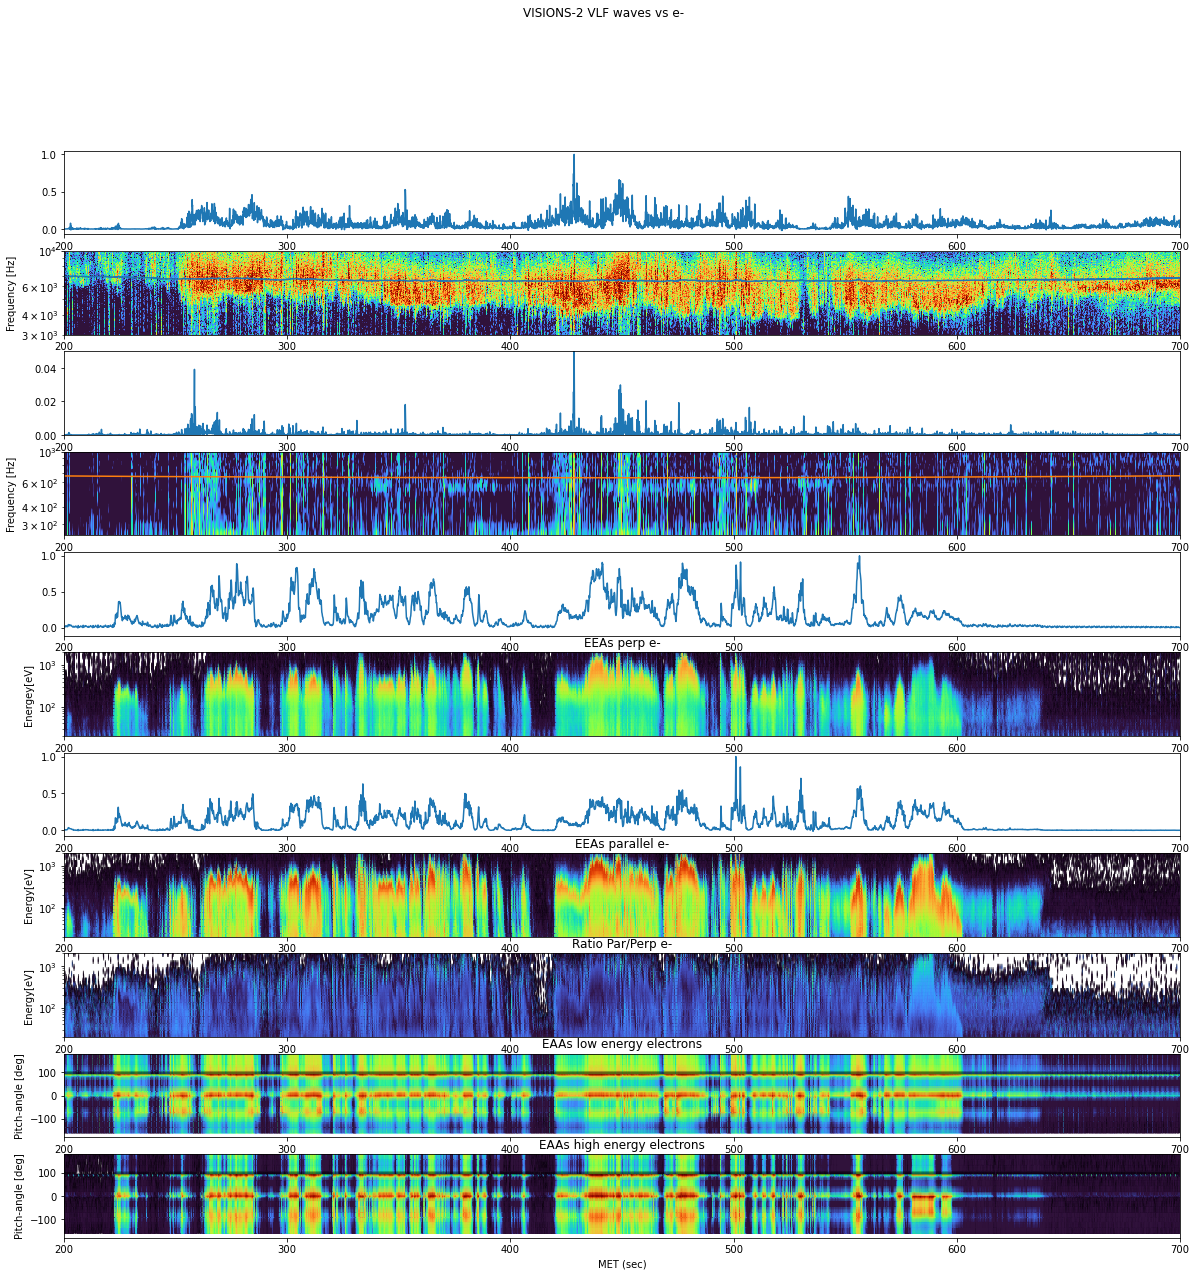

<IPython.core.display.Javascript object>

In [17]:
"""
Hard electrons (>100 eV) are monoenergetic and thus likely accel. by FA potential drops (>1000 km). There's also a soft e- population at ~10 eV. 
The lack of downgoing ions indicates that this is likely an upward current region. 

"""

import scipy.signal

plt.rcParams['figure.figsize'] = [20, 20]

smootime = 0.4

fig, axs = plt.subplots(11)
fig.suptitle('VISIONS-2 VLF waves vs e-')

kwargs = {"vmin":-50, "vmax":-10, "cmap":"turbo", "scale":"dB", "NFFT":512}

p = 0 
vlfAmp_smoothed = IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 3000, 10000, smootime, norm=1)
axs[p].plot(spectimes,vlfAmp_smoothed)
#axs[p].set_ylim(0.,0.4)

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf, Fs=fsVLF, **kwargs)
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('log')
axs[p].set_ylim(3000,10000)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
vlfAmp_smoothed = IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 250, 1000, smootime, norm=1)
axs[p].plot(spectimes,vlfAmp_smoothed)
axs[p].set_ylim(0.,0.05)

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf, Fs=fsVLF, **kwargs)
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('log')
axs[p].set_ylim(250,1000)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
eAmpPerp_smoothed = v2.IntegrateSpectra(elecPerp["flux"],elecPerp["times"],elecPerp["energies"],3,3000,smootime, norm=1)
axs[p].plot(elecPerp["times"],eAmpPerp_smoothed)
p=p+1
PlotParams = {"title":"EEAs perp e-", "yscale":"log", "ylim":[20,2000],"ylabel":"Energey[eV]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecPerp["times"],elecPerp["energies"],elecPerp["flux"],p,**PlotParams)
p=p+1
eAmpPar_smoothed = IntegrateSpectra(elecDowngoing["flux"],elecDowngoing["times"],elecDowngoing["energies"],3,3000,smootime, norm=1)
axs[p].plot(elecDowngoing["times"],eAmpPar_smoothed)
p=p+1
PlotParams = {"title":"EEAs parallel e-", "yscale":"log", "ylim":[20,2000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecDowngoing["times"],elecDowngoing["energies"],elecDowngoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"Ratio Par/Perp e-", "yscale":"log", "ylim":[20,2000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":0,"vmax":5,"colorbar":0}
v2.PlotParticle(elecDowngoing["times"],elecDowngoing["energies"],ratioEDowngoing,p,**PlotParams)
p=p+1
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"EAAs low energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,**PlotParams)
p=p+1
sort = np.argsort(elecHigE["pitchangles"])
PlotParams = {"title":"EAAs high energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecHigE["times"],elecHigE["pitchangles"][sort],elecHigE["flux"][:,sort],p,**PlotParams)


#for i in axs: i.set_xlim(200, 300)
for i in axs: i.set_xlim(200, 700)



### Plot VLF waves and ions [Overview]

/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


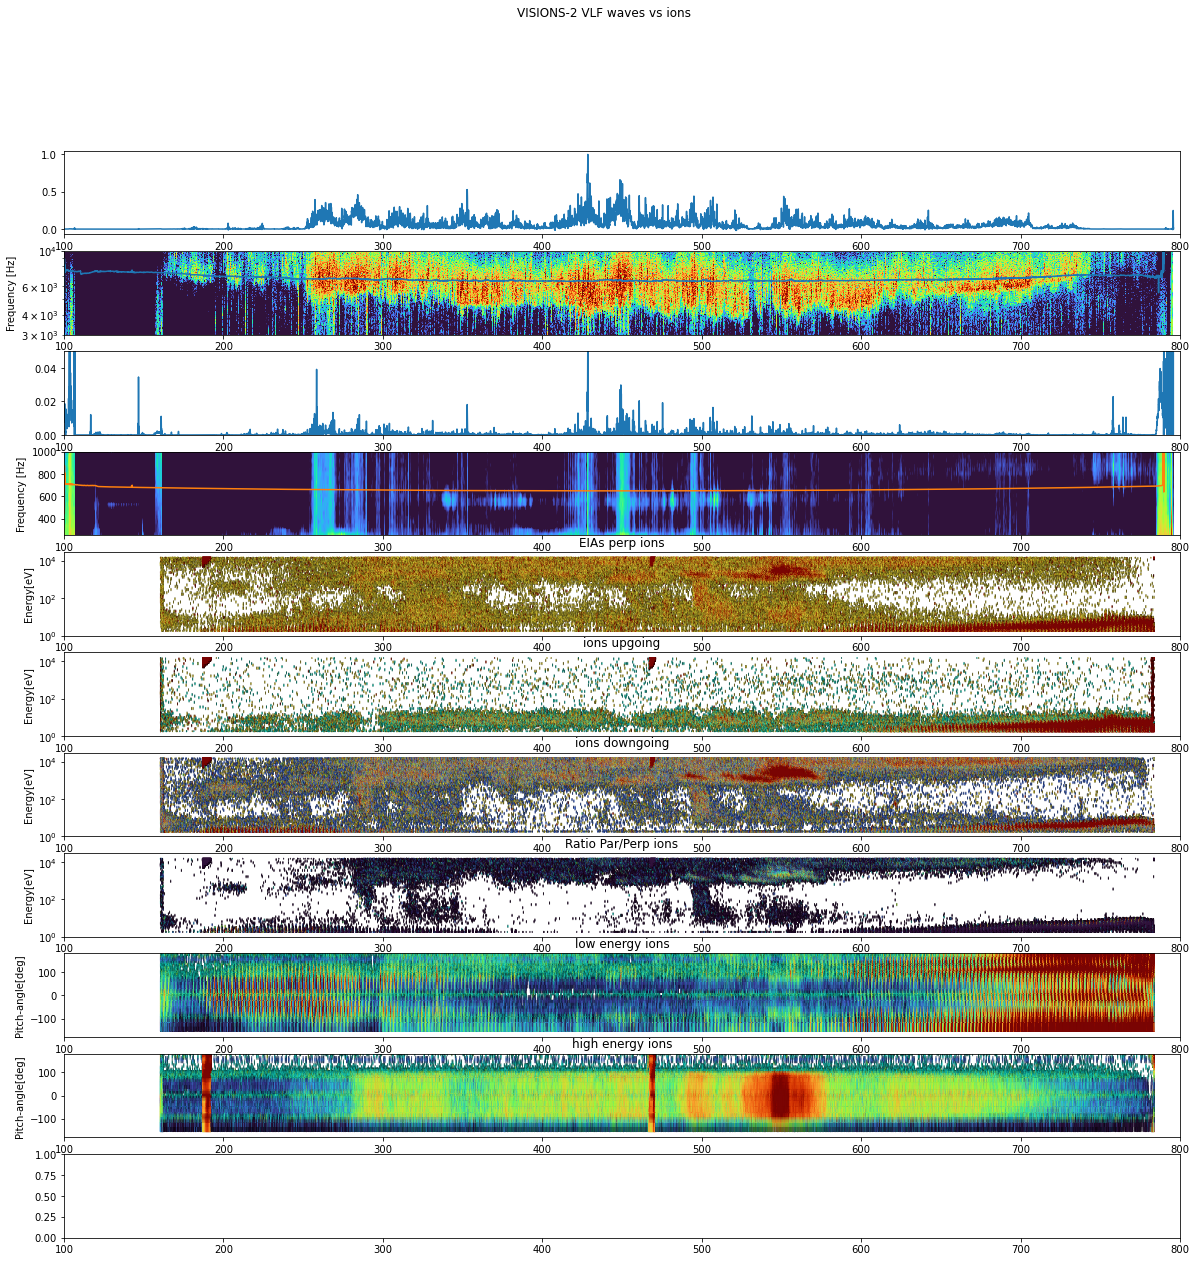

<IPython.core.display.Javascript object>

In [11]:
plt.rcParams['figure.figsize'] = [20, 20]

fig, axs = plt.subplots(11)
fig.suptitle('VISIONS-2 VLF waves vs ions')

kwargs = {"vmin":-50, "vmax":-10}

p=0

vlfAmp_smoothed = IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 3000, 10000, smootime, norm=1)
axs[p].plot(spectimes,vlfAmp_smoothed)

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('log')
axs[p].set_ylim(3000,10000)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
vlfAmp_smoothed = IntegrateSpectra(np.transpose(Sxx), spectimes, specfreqs, 250, 1000, smootime, norm=1)
axs[p].plot(spectimes,vlfAmp_smoothed)
axs[p].set_ylim(0.,0.05)

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('linear')
axs[p].set_ylim(250,1000)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])


#p=p+1
#iAmpPerp_smoothed = IntegrateSpectra(ionsPerp["flux"],ionsPerp["times"],ionsPerp["energies"],3,3000,smootime, norm=1)
#axs[p].plot(ionsPerp["times"],iAmpPerp_smoothed)
p=p+1
PlotParams = {"title":"EIAs perp ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,**PlotParams)
#p=p+1
#iAmpPar_smoothed = IntegrateSpectra(ionsDowngoing["flux"],ionsDowngoing["times"],ionsDowngoing["energies"],3,3000,smootime, norm=1)
#axs[p].plot(ionsDowngoing["times"],iAmpPar_smoothed)
p=p+1
PlotParams = {"title":"ions upgoing", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"ions downgoing", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ionsDowngoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"Ratio Par/Perp ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":0,"vmax":1,"colorbar":0}
v2.PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ratioIDowngoing,p,**PlotParams)
p=p+1
sort = np.argsort(ionsLowE["pitchangles"])
PlotParams = {"title":"low energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsLowE["times"],ionsLowE["pitchangles"][sort],ionsLowE["flux"][:,sort],p,**PlotParams)
p=p+1
sort = np.argsort(ionsHigE["pitchangles"])
PlotParams = {"title":"high energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsHigE["times"],ionsHigE["pitchangles"][sort],ionsHigE["flux"][:,sort],p,**PlotParams)


#for i in axs: i.set_xlim(200, 300)
for i in axs: i.set_xlim(100, 800)

### Ion parallel enhancements from 480-600 MET

###### Multiple influxes of ~1 keV ions peaked in FA direction (but fairly broad in PA). These may have a chevron dispersion in PA with perp arriving first
###### 10s eV ions are observed with highly perp PAs
###### Seems to be associated w/ intensification of VLF waves but decrease of ELF (30-300 Hz) waves

In [12]:
plt.rcParams['figure.figsize'] = [10, 15]


ionsLowE_tmp = visions2_load_data.load_particle("eia",range=[0,50],sumtype=2)
ionsHigE_tmp = visions2_load_data.load_particle("eia",range=[800,4000],sumtype=2)


fig, axs = plt.subplots(7)
fig.suptitle('VISIONS-2 VLF waves vs ions')

kwargs = {"vmin":-40, "vmax":-10}

p=0
axs[p].plot(mag["times"], ne)
axs[p].set_yscale('linear')
axs[p].set_ylim(np.median(ne)/1.3, np.median(ne)*1.3)

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('log')
axs[p].set_ylim(4000,10000)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])

p=p+1
Sxx, specfreqs, spectimes, im = axs[p].specgram(dvlf12_lf, Fs=fsVLF, NFFT=512, scale='dB', **kwargs, cmap='turbo')
axs[p].plot(spectimes, flh_interp)
axs[p].plot(spectimes, fcH_interp)
axs[p].plot(spectimes, fcO_interp)
axs[p].set_ylabel('Frequency [Hz]')
axs[p].set_xlabel('Time [sec]')
axs[p].set_yscale('linear')
axs[p].set_ylim(30,300)
#fig.colorbar(im, label="VLF12 dB", ax=axs[p])


p=p+1
PlotParams = {"title":"EIAs perp ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":5,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"EIAs par ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":5,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ionsDowngoing["flux"],p,**PlotParams)
p=p+1
sort = np.argsort(ionsHigE_tmp["pitchangles"])
PlotParams = {"title":"EIAs par ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":5,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsHigE_tmp["times"],ionsHigE_tmp["pitchangles"][sort],ionsHigE_tmp["flux"][:,sort],p,**PlotParams)
p=p+1
sort = np.argsort(ionsLowE_tmp["pitchangles"])
PlotParams = {"title":"EIAs low energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsLowE_tmp["times"],ionsLowE_tmp["pitchangles"][sort],ionsLowE_tmp["flux"][:,sort],p,**PlotParams)

for i in axs: i.set_xlim(255, 258)
#for i in axs: i.set_xlim(480, 520)

LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


<IPython.core.display.Javascript object>

In [13]:
"""
Recreate Rob's poster plot of EEAs electrons from 3-30 eV for 0 deg pitch angle bin for times of 326 - 344 sec from launch
"""




"\nRecreate Rob's poster plot of EEAs electrons from 3-30 eV for 0 deg pitch angle bin for times of 326 - 344 sec from launch\n"

<IPython.core.display.Javascript object>

### Test recreate Rowland plot showing different particle populations

In [14]:
#import scipy.signal

plt.rcParams['figure.figsize'] = [20, 20]

#smootime = 0.4


fig, axs = plt.subplots(6)
fig.suptitle('VISIONS-2 Particles overview')

kwargs = {"vmin":-50, "vmax":-10, "cmap":"turbo", "scale":"dB", "NFFT":512}

p = 0 
PlotParams = {"title":"downgoing e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecDowngoing["times"],elecDowngoing["energies"],elecDowngoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"perp e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecPerp["times"],elecPerp["energies"],elecPerp["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"upgoing e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecUpgoing["times"],elecUpgoing["energies"],elecUpgoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"downgoing ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7.5,"colorbar":0}
v2.PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ionsDowngoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"perp ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7.5,"colorbar":0}
v2.PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"upgoing ions", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7.5,"colorbar":0}
v2.PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,**PlotParams)

for i in axs: i.set_xlim(250, 260)
#for i in axs: i.set_xlim(480, 520)

/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


<IPython.core.display.Javascript object>

LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


'\np=p+1\nsort = np.argsort(ionsLowE["pitchangles"])\nPlotParams = {"title":"EIAs low energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}\nPlotParticle(ionsLowE["times"],ionsLowE["pitchangles"][sort],ionsLowE["flux"][:,sort],p,**PlotParams)\np=p+1\nsort = np.argsort(ionsSuprathermalE["pitchangles"])\nPlotParams = {"title":"EIAs high energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}\nPlotParticle(ionsHigE["times"],ionsHigE["pitchangles"][sort],ionsHigE["flux"][:,sort],p,**PlotParams)\n'

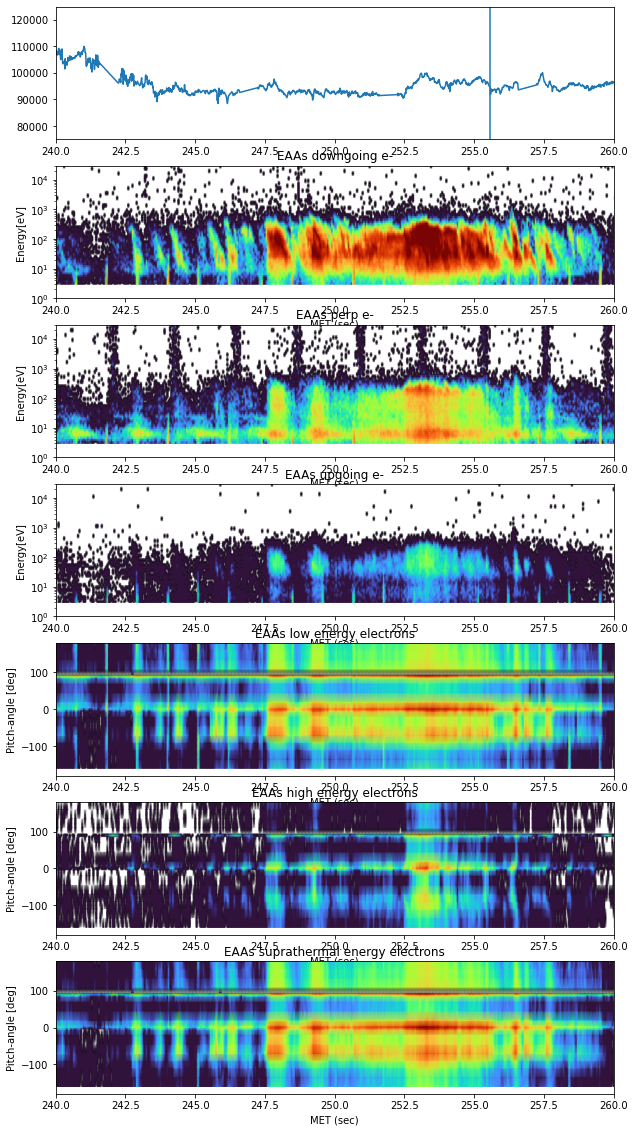

<IPython.core.display.Javascript object>

In [15]:
# Plot LHSS [Schuck+03] observed on low-flyer (t=255.58)
# -Density depletion observed in Langmuir Probe data
# -Assoc. with bursts of power just under (and above) LH freq. f<flhr is permitted by existence of Hall current in density cavity from linear theory (Schuck+03)
# -Seen near boundary of inverted-V structure, which is typical
# -Exists in presence of VLF wave energy near LH freq
# -Possible assoc. with burst of downgoing electrons

#NOTE: Any TAI would be subtle and would occur at energies of a few eV (Schuck03)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]

ionsSuprathermalE = visions2_load_data.load_particle("eia",range=[10,50000],sumtype=2)
elecSuprathermalE = visions2_load_data.load_particle("eea",range=[10,50000],sumtype=2)


fig, axs = plt.subplots(7)
lptimes = lp["lowflyer"]["times"]
density = lp["lowflyer"]["ne"]

p=0
axs[p].plot(lptimes, density)
axs[p].set_xlim(250,260)
axs[p].set_ylim(75000,125000)
#plt.axvline(x=255.58)
axs[p].axvline(x=255.58)  #Location of LHSS

"""
p=p+1
sort = np.argsort(ionsSuprathermalE["pitchangles"])
PlotParams = {"title":"EIAs suprathermal ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsSuprathermalE["times"],ionsSuprathermalE["pitchangles"][sort],ionsSuprathermalE["flux"][:,sort],p,**PlotParams)
p=p+1
PlotParams = {"title":"EIAs upgoing ions", "yscale":"log", "ylim":[20,10000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"EIAs perp ions", "yscale":"log", "ylim":[20,10000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"EIAs downgoing ions", "yscale":"log", "ylim":[20,10000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7,"colorbar":0}
v2.PlotParticle(ionsDowngoing["times"],ionsDowngoing["energies"],ionsDowngoing["flux"],p,**PlotParams)
"""
p = p+1
PlotParams = {"title":"EAAs downgoing e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecDowngoing["times"],elecDowngoing["energies"],elecDowngoing["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"EAAs perp e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecPerp["times"],elecPerp["energies"],elecPerp["flux"],p,**PlotParams)
p=p+1
PlotParams = {"title":"EAAs upgoing e-", "yscale":"log", "ylim":[1,30000],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecUpgoing["times"],elecUpgoing["energies"],elecUpgoing["flux"],p,**PlotParams)
p=p+1
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"EAAs low energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,**PlotParams)
p=p+1
sort = np.argsort(elecHigE["pitchangles"])
PlotParams = {"title":"EAAs high energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecHigE["times"],elecHigE["pitchangles"][sort],elecHigE["flux"][:,sort],p,**PlotParams)
p=p+1
sort = np.argsort(elecSuprathermalE["pitchangles"])
PlotParams = {"title":"EAAs suprathermal energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecSuprathermalE["times"],elecSuprathermalE["pitchangles"][sort],elecSuprathermalE["flux"][:,sort],p,**PlotParams)


#for i in axs: i.set_xlim(200, 300)
for i in axs: i.set_xlim(240, 260)


"""
p=p+1
sort = np.argsort(ionsLowE["pitchangles"])
PlotParams = {"title":"EIAs low energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsLowE["times"],ionsLowE["pitchangles"][sort],ionsLowE["flux"][:,sort],p,**PlotParams)
p=p+1
sort = np.argsort(ionsSuprathermalE["pitchangles"])
PlotParams = {"title":"EIAs high energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle[deg]","xlabel":"MET (sec)","vmin":6,"vmax":8,"colorbar":0}
v2.PlotParticle(ionsHigE["times"],ionsHigE["pitchangles"][sort],ionsHigE["flux"][:,sort],p,**PlotParams)
"""



LOAD PARTICLE - currently low flyer only 


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


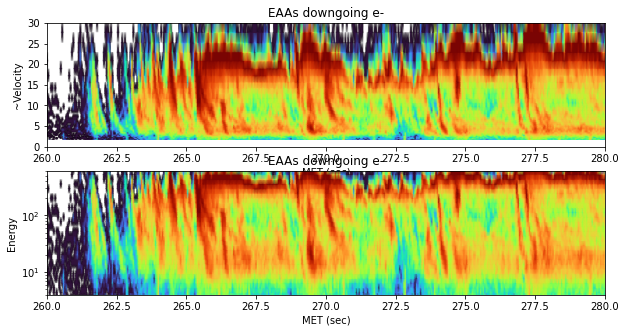

<IPython.core.display.Javascript object>

In [16]:
""" 
I don't think this analysis is valid b/c the dispersion isn't linear in velocity, which would be expected for a time of flight propagation from an instantaneous source
"""

plt.rcParams['figure.figsize'] = [10, 5]


fig, axs = plt.subplots(2)
lptimes = lp["lowflyer"]["times"]
density = lp["lowflyer"]["ne"]


elecDowngoing2 = visions2_load_data.load_particle("eea",range=[-2,2],sumtype=1)


#Transform to velocity space (sqrt of energy space (E ~ v^2))


p = 0
PlotParams = {"title":"EAAs downgoing e-", "yscale":"linear", "ylim":[0,30],"ylabel":"~Velocity","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecDowngoing2["times"],np.sqrt(elecDowngoing2["energies"]),elecDowngoing2["flux"],p,**PlotParams)
p = p+1
PlotParams = {"title":"EAAs downgoing e-", "yscale":"log", "ylim":[4,600],"ylabel":"Energy","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecDowngoing2["times"],elecDowngoing2["energies"],elecDowngoing2["flux"],p,**PlotParams)


for i in axs: i.set_xlim(260, 280)
#for i in axs: i.set_xlim(261.5, 263)







In [4]:
#Mess around with plotting VLF34 data from high flyer 

fig, axs = plt.subplots(2)

vlf34_hf = vlfdata["vlf34_hf"]


dvlf34_lf = vlf34_hf["sfidvals"]
times_vlf_hf = vlf34_hf["tvals"]

#sampling freq
sr_hf = [1/(times_vlf_hf[i+1]-times_vlf_hf[i]) for i in range(times_vlf_hf.size-1)]
fsVLF_hf = np.mean(sr_hf)


#axs[0].plot(times_vlf_hf)

#fig, axs = plt.subplots(1)
Sxx, specfreqs, spectimes, im = axs[0].specgram(dvlf34_lf, Fs=fsVLF_hf, NFFT=512, scale='dB', cmap='turbo')
#fcH_interp = np.interp(spectimes, mag["times"], mag["fcH"])
#fcO_interp = np.interp(spectimes, mag["times"], mag["fcO"])


"""
dict_keys(['channel', 'chdesc', 'dvals', 'sfidvals', 'tvals', 'samplerate', 'timetagmethod', 'flight', 'datafile', 'inputfile', 'format', 'link', 't0', 't0units', 'author', 'date', 'dataunits', 'timeunits', 'firstsfid'])

np.shape(vlf12_lf["dvlf12"])
(15918022,)

np.shape(vlf34_hf["dvals"])
(7990127, 6)
np.shape(vlf34_hf["sfidvals"])
(7990127,)
np.shape(vlf34_hf["tvals"])
(7990127,)

"""


'\ndict_keys([\'channel\', \'chdesc\', \'dvals\', \'sfidvals\', \'tvals\', \'samplerate\', \'timetagmethod\', \'flight\', \'datafile\', \'inputfile\', \'format\', \'link\', \'t0\', \'t0units\', \'author\', \'date\', \'dataunits\', \'timeunits\', \'firstsfid\'])\n\nnp.shape(vlf12_lf["dvlf12"])\n(15918022,)\n\nnp.shape(vlf34_hf["dvals"])\n(7990127, 6)\nnp.shape(vlf34_hf["sfidvals"])\n(7990127,)\nnp.shape(vlf34_hf["tvals"])\n(7990127,)\n\n'

<IPython.core.display.Javascript object>

LOAD PARTICLE - currently low flyer only 
LOAD PARTICLE - currently low flyer only 


/var/folders/4k/77cxhshd64ddlfbx5599g8rw0000gp/T/ipykernel_74419/848152535.py:5: RuntimeWarning: divide by zero encountered in log10
  pcm1 = axs[p].pcolormesh(xvals,yvals,np.transpose(np.log10(zvals)),shading='gouraud',cmap='turbo',vmin=PlotParams["vmin"],vmax=PlotParams["vmax"])


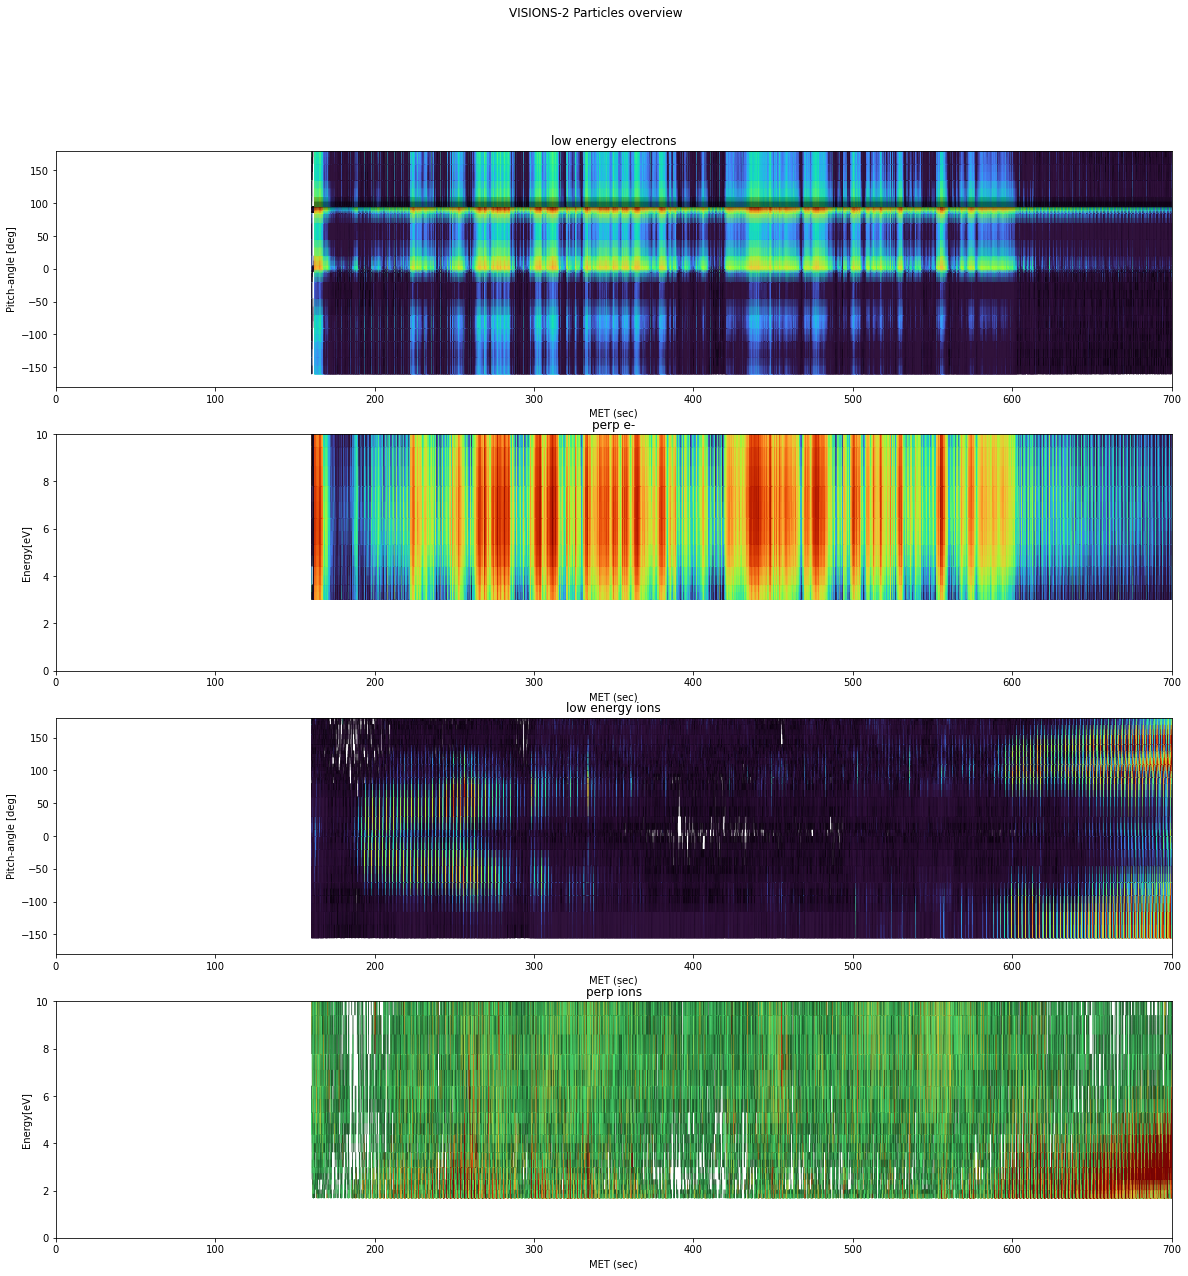

<IPython.core.display.Javascript object>

In [26]:

#What causes spinperiod increases in ion and e- flux? 

plt.rcParams['figure.figsize'] = [20, 20]

#smootime = 0.4
elecLowE = visions2_load_data.load_particle("eea",range=[0,10],sumtype=2)
elecLowI = visions2_load_data.load_particle("eia",range=[0,10],sumtype=2)



fig, axs = plt.subplots(4)
fig.suptitle('VISIONS-2 Particles overview')

kwargs = {"vmin":-50, "vmax":-10, "cmap":"turbo", "scale":"dB", "NFFT":512}

p=0
sort = np.argsort(elecLowE["pitchangles"])
PlotParams = {"title":"low energy electrons", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":8,"vmax":11,"colorbar":0}
v2.PlotParticle(elecLowE["times"],elecLowE["pitchangles"][sort],elecLowE["flux"][:,sort],p,**PlotParams)
p=p+1
PlotParams = {"title":"perp e-", "yscale":"linear", "ylim":[0,10],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":8,"vmax":10,"colorbar":0}
v2.PlotParticle(elecPerp["times"],elecPerp["energies"],elecPerp["flux"],p,**PlotParams)
p=p+1
sort = np.argsort(elecLowI["pitchangles"])
PlotParams = {"title":"low energy ions", "yscale":"linear", "ylim":[-180,180],"ylabel":"Pitch-angle [deg]","xlabel":"MET (sec)","vmin":7,"vmax":9,"colorbar":0}
v2.PlotParticle(elecLowI["times"],elecLowI["pitchangles"][sort],elecLowI["flux"][:,sort],p,**PlotParams)
p=p+1
PlotParams = {"title":"perp ions", "yscale":"linear", "ylim":[0,10],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7.5,"colorbar":0}
v2.PlotParticle(ionsPerp["times"],ionsPerp["energies"],ionsPerp["flux"],p,**PlotParams)
#p=p+1
#PlotParams = {"title":"upgoing ions", "yscale":"linear", "ylim":[0,100],"ylabel":"Energy[eV]","xlabel":"MET (sec)","vmin":6,"vmax":7.5,"colorbar":0}
#v2.PlotParticle(ionsUpgoing["times"],ionsUpgoing["energies"],ionsUpgoing["flux"],p,**PlotParams)

for i in axs: i.set_xlim(0, 700)
#for i in axs: i.set_xlim(480, 520)